In [78]:
import time
import torch
import VGPAE
from utils import get_dataloader, backtrans, imshow
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sns
import VGPAE_td
import numpy as np
np.set_printoptions(precision=4)


activFunName = 'lrelu'  # tanh used in the synthetics
activations_list = {
    'softplus': nn.Softplus(),
    'lrelu': nn.LeakyReLU(),
    'relu': nn.ReLU()
}
activFun = activations_list[activFunName]
classes = [str(i) for i in range(1,10)]


In [66]:
# load data
batch_size_train = 1000
dataset = 'MNIST'
train_loader = get_dataloader(dataset, batch_size_train,False)
# initialize model

latent_dim1 = 2
latent_dim2 = 2
in_channel = 1
model = VGPAE.VGPAE(in_channel, latent_dim1, latent_dim2, activFun, 28)
model_file = 'models/MNIST_VGPAE_2_2wu_w1.0_loss_function_3000.pth'
model.load_state_dict(torch.load(model_file))
model.eval();

tensor([0.8875, 0.5527], grad_fn=<SoftplusBackward>)
tensor([[1.6346, 1.8023]], grad_fn=<ExpBackward>)
tensor([0.1475, 0.0031], grad_fn=<ExpBackward>)
tensor(0.0752)


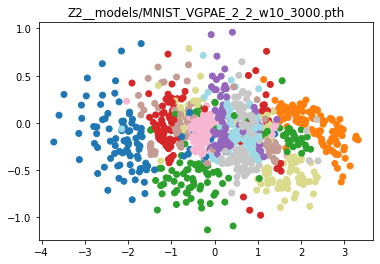

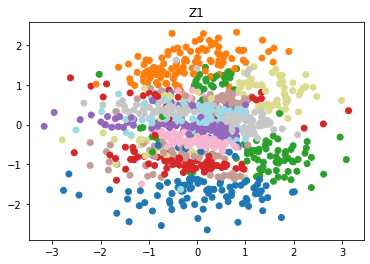

In [39]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)
plt.figure()
plt.scatter(z1_mu[:,0],z1_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z1')
print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)


<AxesSubplot:>

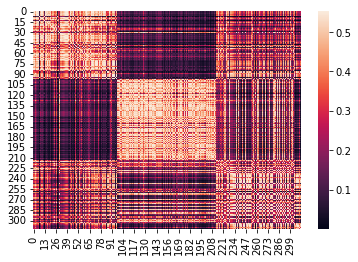

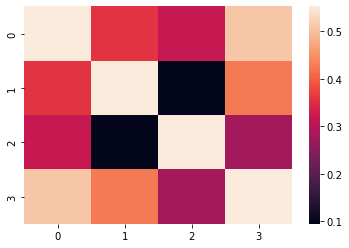

In [13]:
zero = list(*np.where(Label==0))
one = list(*np.where(Label==1))
two = list(*np.where(Label==2))
index = zero + one + two
sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[1])
plt.figure()
index = zero + two
index = [1,56,28,25]
sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[1])

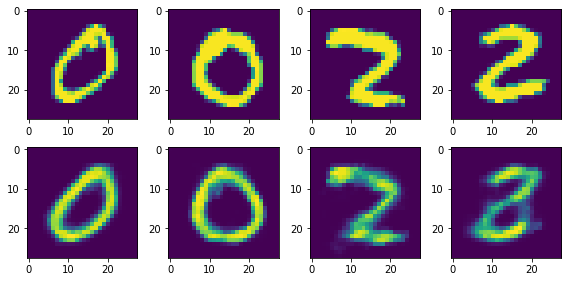

In [37]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(8, 4))
img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img = np.concatenate([img_real,img_rec],axis=0)
n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


tensor([0.4902, 0.5178], grad_fn=<SoftplusBackward>)
tensor([[1.5313, 1.6344]], grad_fn=<ExpBackward>)
tensor([0.2014, 0.0031], grad_fn=<ExpBackward>)


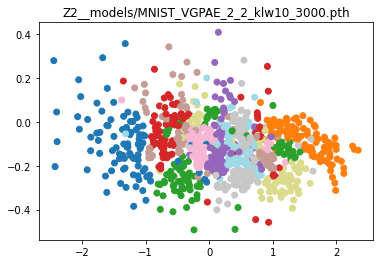

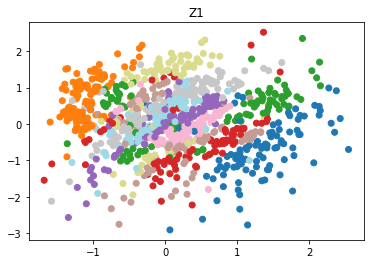

In [41]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)
plt.figure()
plt.scatter(z1_mu[:,0],z1_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z1')
print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)


<AxesSubplot:>

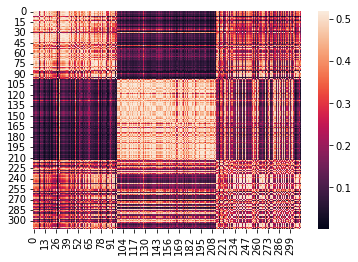

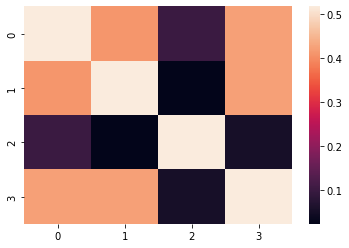

In [42]:
zero = list(*np.where(Label==0))
one = list(*np.where(Label==1))
two = list(*np.where(Label==2))
index = zero + one + two
sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[1])
plt.figure()
index = zero + two
index = [1,56,28,25]
sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[1])

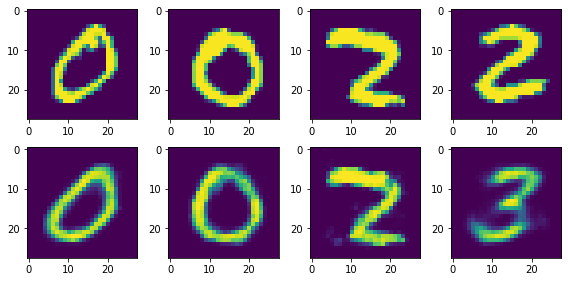

In [43]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(8, 4))
img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img = np.concatenate([img_real,img_rec],axis=0)
n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


tensor([0.3553, 0.6276, 0.3575, 0.2839, 0.4630], grad_fn=<SoftplusBackward>)
tensor([[3.4208, 3.1268, 2.4999, 2.2327, 2.9974]], grad_fn=<ExpBackward>)
tensor([1.1030, 0.9535, 1.1722, 0.2031, 0.5108], grad_fn=<ExpBackward>)


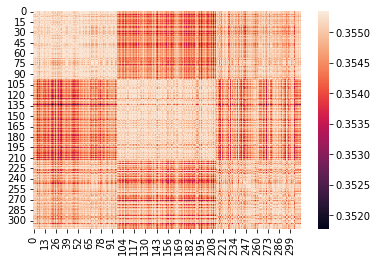

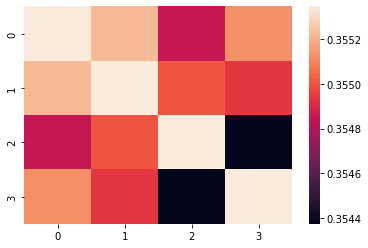

In [62]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
zero = list(*np.where(Label==0))
one = list(*np.where(Label==1))
two = list(*np.where(Label==2))
index = zero + one + two

sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[0])
plt.figure()

# index = zero + two
index = [1,56,28,25]
sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[0])
print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)

In [58]:
print(f"z1_mu_mean:{z1_mu.mean(dim=0).numpy()}, z1_mu_var:{z1_mu.var(dim=0).numpy()}")
print(f"z1_var_mean:{log_z1_var.exp().mean(dim=0).numpy()}, z1_var_var:{log_z1_var.exp().var(dim=0).numpy()}")

z1_mu_mean:[ 0.002  -0.0212  0.0092  0.0002  0.0254], z1_mu_var:[0.0015 0.0013 0.002  0.0015 0.0014]
z1_var_mean:[0.973  0.9984 0.9902 0.9787 0.9699], z1_var_var:[0.0017 0.0027 0.0023 0.0038 0.0019]


In [59]:
print(f"z2_mu_mean:{z2_mu.mean(dim=0).numpy()}, z2_mu_var:{z2_mu.var(dim=0).numpy()}")
print(f"z2_var_mean:{log_z2_var.exp().mean(dim=0).numpy()}, z2_var_var:{log_z2_var.exp().var(dim=0).numpy()}")

z2_mu_mean:[ 0.0387  0.0804 -0.1143 -0.1374 -0.0094], z2_mu_var:[1.0828 0.9779 1.1679 0.1732 0.4551]
z2_var_mean:[0.0519 0.0284 0.0262 0.0519 0.0722], z2_var_var:[0.0057 0.0007 0.0003 0.0027 0.01  ]


In [61]:
torch.inverse(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[0]+torch.eye(312))

tensor([[ 0.9967, -0.0033, -0.0032,  ..., -0.0032, -0.0033, -0.0032],
        [-0.0033,  0.9965, -0.0033,  ..., -0.0031, -0.0035, -0.0035],
        [-0.0032, -0.0033,  0.9967,  ..., -0.0031, -0.0034, -0.0033],
        ...,
        [-0.0032, -0.0031, -0.0031,  ...,  0.9967, -0.0030, -0.0032],
        [-0.0033, -0.0035, -0.0034,  ..., -0.0030,  0.9965, -0.0034],
        [-0.0032, -0.0035, -0.0033,  ..., -0.0032, -0.0034,  0.9963]])

KL(q(Z2|X)||p(Z2|Z1)) where p(Z2|Z1) is Gaussian prior N(0,K). The Covariance matrix learned by model is not diagnoal but it's equivalent to diagonal which made the Gaussian prior equivalent to a isotropic Gaussian distribution as

$logp(Z_2) = - (Z_2-0)^T(K_{learned} + \sigma^2 I)^{-1}(Z_2-0) + other terms  $



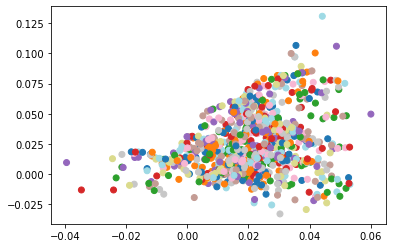

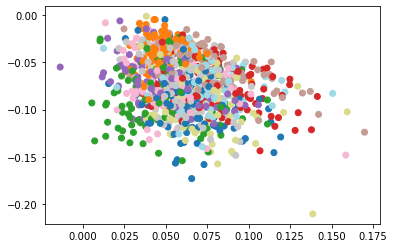

In [63]:

batch_size_train = 1000

dataset = 'MNIST'
train_loader = get_dataloader(dataset, batch_size_train,False)
# initialize model

latent_dim1 = 2
latent_dim2 = 2
in_channel = 1
model = VGPAE_td.VGPAEtd(in_channel, latent_dim1, latent_dim2, activFun, 28)
model.load_state_dict(torch.load('models/MNIST_VGPAEtd_2_2_w10_3000.pth'))
model.eval();

Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.figure()
plt.scatter(z1_mu[:,0],z1_mu[:,1],c = Label, label =Label, cmap='tab20')

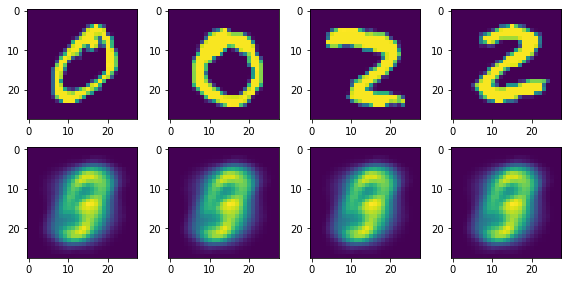

In [64]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(8, 4))
img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img = np.concatenate([img_real,img_rec],axis=0)
n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


In [90]:
# load data
batch_size_train = 1000
dataset = 'MNIST'
train_loader = get_dataloader(dataset, batch_size_train,False)
# initialize model

latent_dim1 = 5
latent_dim2 = 5
in_channel = 1
model = VGPAE.VGPAE(in_channel, latent_dim1, latent_dim2, activFun, 28)
model_file = 'models/MNIST_VGPAE_5_5wu_w10.0_loss_function_3000.pth'
model.load_state_dict(torch.load(model_file))
model.eval();

tensor([2.0507, 2.1632], grad_fn=<SoftplusBackward>)
tensor([[2.4139, 1.7373]], grad_fn=<ExpBackward>)
tensor([0.1842, 0.1390], grad_fn=<ExpBackward>)


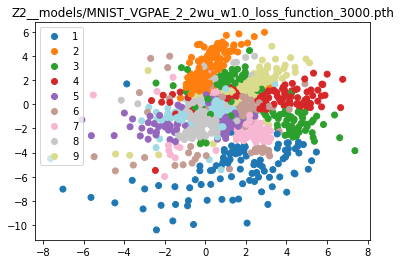

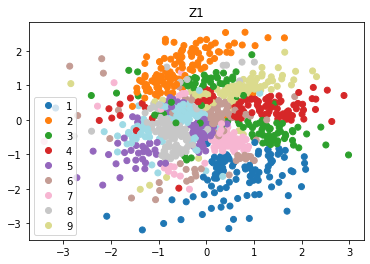

In [79]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
scatter = plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.figure()

scatter = plt.scatter(z1_mu[:,0],z1_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z1')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)


<AxesSubplot:>

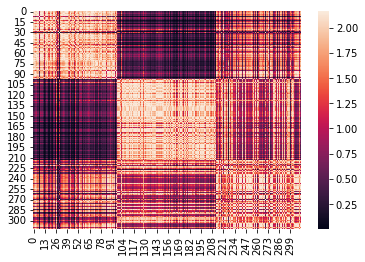

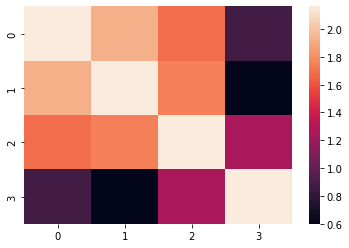

In [68]:
zero = list(*np.where(Label==0))
one = list(*np.where(Label==1))
two = list(*np.where(Label==2))
index = zero + one + two
sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[1])
plt.figure()
index = zero + two
index = [1,56,28,25]
sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[1])

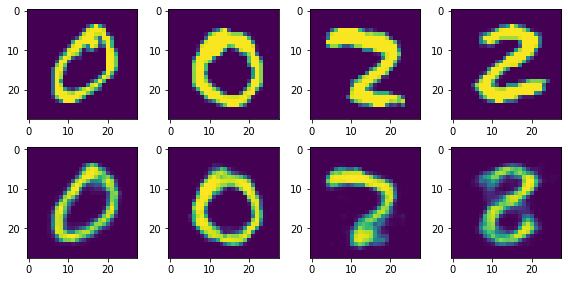

In [80]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(8, 4))
img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img = np.concatenate([img_real,img_rec],axis=0)
n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


models/MNIST_VGPAE_5_5wu_w10.0_loss_function_3000.pth
tensor([0.4053, 0.6644, 0.4464, 0.3807, 0.4790], grad_fn=<SoftplusBackward>)
tensor([[3.5850, 3.3756, 2.7806, 2.5939, 3.1782]], grad_fn=<ExpBackward>)
tensor([0.3382, 0.2286, 0.2868, 0.2682, 0.2517], grad_fn=<ExpBackward>)


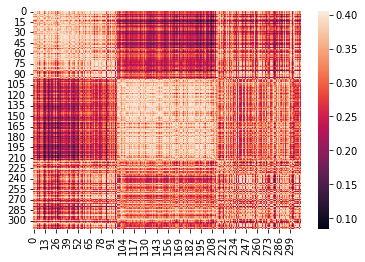

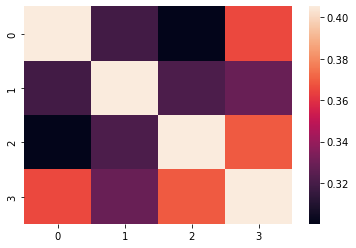

In [96]:
print(model_file)
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
zero = list(*np.where(Label==0))
one = list(*np.where(Label==1))
two = list(*np.where(Label==2))
index = zero + one + two

sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[0])
plt.figure()

# index = zero + two
ind = [1,56,28,25]
sns.heatmap(model.covar_module(z1_mu[ind],z1_mu[ind]).evaluate().detach()[0])
print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)

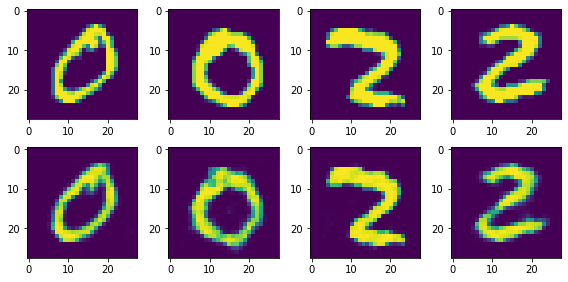

In [93]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(8, 4))
img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img = np.concatenate([img_real,img_rec],axis=0)
n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


In [94]:
print(f"z1_mu_mean:{z1_mu.mean(dim=0).numpy()}, z1_mu_var:{z1_mu.var(dim=0).numpy()}")
print(f"z1_var_mean:{log_z1_var.exp().mean(dim=0).numpy()}, z1_var_var:{log_z1_var.exp().var(dim=0).numpy()}")
print(f"z2_mu_mean:{z2_mu.mean(dim=0).numpy()}, z2_mu_var:{z2_mu.var(dim=0).numpy()}")
print(f"z2_var_mean:{log_z2_var.exp().mean(dim=0).numpy()}, z2_var_var:{log_z2_var.exp().var(dim=0).numpy()}")

z1_mu_mean:[-0.0104 -0.0192 -0.0325 -0.0134  0.0222], z1_mu_var:[0.0016 0.0048 0.5558 0.6365 0.3987]
z1_var_mean:[0.9483 0.9643 0.3875 0.3445 0.5531], z1_var_var:[0.0068 0.0072 0.0058 0.0076 0.007 ]
z2_mu_mean:[ 0.0361 -0.0093 -0.1822 -0.3174  0.0054], z2_mu_var:[0.3408 0.4982 0.6759 0.3098 0.5733]
z2_var_mean:[0.0267 0.0182 0.0195 0.0398 0.0415], z2_var_var:[0.0017 0.0001 0.0002 0.0012 0.0031]


In [104]:
torch.inverse(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[1]+torch.eye(312))

tensor([[ 9.9010e-01, -9.9441e-03, -8.2607e-03,  ..., -6.8072e-05,
         -2.3446e-03, -1.9424e-03],
        [-9.9442e-03,  9.8845e-01, -6.4554e-03,  ..., -8.0942e-04,
         -4.2914e-03, -4.1302e-03],
        [-8.2606e-03, -6.4555e-03,  9.8917e-01,  ...,  6.9258e-04,
         -2.0241e-03,  1.4366e-04],
        ...,
        [-6.8062e-05, -8.0941e-04,  6.9251e-04,  ...,  9.7891e-01,
         -2.2343e-02,  1.8198e-03],
        [-2.3446e-03, -4.2914e-03, -2.0240e-03,  ..., -2.2343e-02,
          9.5443e-01,  8.4885e-04],
        [-1.9424e-03, -4.1303e-03,  1.4365e-04,  ...,  1.8199e-03,
          8.4887e-04,  9.6666e-01]])

models/MNIST_VGPAE_5_5wu_w1.0_loss_function_3000.pth
tensor([0.8543, 0.9227, 0.8093, 0.7742, 0.7746], grad_fn=<SoftplusBackward>)
tensor([[3.2147, 2.7822, 2.7509, 2.1725, 2.9018]], grad_fn=<ExpBackward>)
tensor([0.2338, 0.1650, 0.2206, 0.2244, 0.2211], grad_fn=<ExpBackward>)


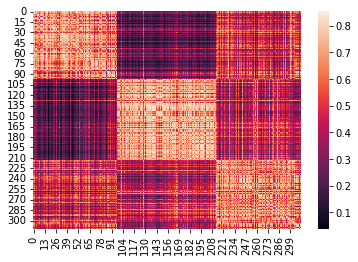

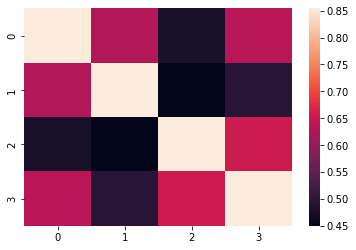

In [84]:
print(model_file)
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
zero = list(*np.where(Label==0))
one = list(*np.where(Label==1))
two = list(*np.where(Label==2))
index = zero + one + two

sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[0])
plt.figure()

# index = zero + two
index = [1,56,28,25]
sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[0])
print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)

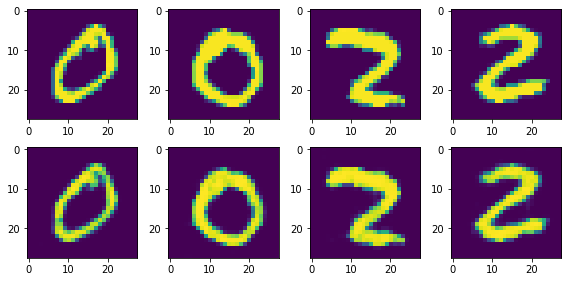

In [85]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(8, 4))
img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img = np.concatenate([img_real,img_rec],axis=0)
n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


In [86]:
print(f"z1_mu_mean:{z1_mu.mean(dim=0).numpy()}, z1_mu_var:{z1_mu.var(dim=0).numpy()}")
print(f"z1_var_mean:{log_z1_var.exp().mean(dim=0).numpy()}, z1_var_var:{log_z1_var.exp().var(dim=0).numpy()}")

z1_mu_mean:[-0.0137 -0.0219 -0.0271 -0.0046 -0.0013], z1_mu_var:[0.7212 0.8152 0.7601 0.919  0.8332]
z1_var_mean:[0.2247 0.1605 0.1928 0.0893 0.124 ], z1_var_var:[0.0165 0.0064 0.0126 0.0004 0.0013]


In [87]:
print(f"z2_mu_mean:{z2_mu.mean(dim=0).numpy()}, z2_mu_var:{z2_mu.var(dim=0).numpy()}")
print(f"z2_var_mean:{log_z2_var.exp().mean(dim=0).numpy()}, z2_var_var:{log_z2_var.exp().var(dim=0).numpy()}")

z2_mu_mean:[-0.0763 -0.4315 -0.2277 -0.1927  0.0979], z2_mu_var:[1.7343 1.6071 1.9572 1.4765 1.6764]
z2_var_mean:[0.006  0.0066 0.0053 0.0087 0.0055], z2_var_var:[1.1948e-05 8.6345e-06 6.1733e-06 1.2555e-05 6.4099e-06]


In [89]:
torch.inverse(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[0]+torch.eye(312))

tensor([[ 9.8323e-01, -1.4189e-02, -6.0491e-03,  ...,  1.2895e-04,
          3.3877e-05, -1.6897e-04],
        [-1.4189e-02,  9.7240e-01,  9.4553e-04,  ..., -2.9093e-03,
         -6.1765e-04, -1.7345e-03],
        [-6.0490e-03,  9.4558e-04,  9.1943e-01,  ...,  1.4924e-03,
          5.4173e-04,  6.4228e-03],
        ...,
        [ 1.2896e-04, -2.9093e-03,  1.4924e-03,  ...,  9.4967e-01,
         -3.7908e-02,  2.0916e-03],
        [ 3.3833e-05, -6.1764e-04,  5.4173e-04,  ..., -3.7908e-02,
          8.6048e-01,  3.3336e-03],
        [-1.6896e-04, -1.7345e-03,  6.4228e-03,  ...,  2.0915e-03,
          3.3336e-03,  9.4966e-01]])